<a href="https://colab.research.google.com/github/youngchul-sung/three-minutes-keras/blob/master/ex2_2_ann_rg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

TensorFlow 2.x selected.


In [0]:
def save_history_history(fname, history_history, fold=''):
    np.save(os.path.join(fold, fname), history_history)


def load_history_history(fname, fold=''):
    history_history = np.load(os.path.join(fold, fname)).item(0)
    return history_history


def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)


def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()
    plot_acc(history, '(b) Accracy trajectory')
    plt.show()


def plot_acc_loss(history):
    plot_acc(history, '(a) Accracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 - 0s - loss: 491.2403 - val_loss: 112.4708
Epoch 2/100
323/323 - 0s - loss: 96.6628 - val_loss: 82.7171
Epoch 3/100
323/323 - 0s - loss: 76.1820 - val_loss: 102.7757
Epoch 4/100
323/323 - 0s - loss: 75.4985 - val_loss: 59.3269
Epoch 5/100
323/323 - 0s - loss: 55.8227 - val_loss: 177.6592
Epoch 6/100
323/323 - 0s - loss: 129.3310 - val_loss: 55.1743
Epoch 7/100
323/323 - 0s - loss: 51.9216 - val_loss: 50.0359
Epoch 8/100
323/323 - 0s - loss: 47.2185 - val_loss: 50.5089
Epoch 9/100
323/323 - 0s - loss: 44.4073 - val_loss: 48.7664
Epoch 10/100
323/323 - 0s - loss: 46.1033 - val_loss: 55.4578
Epoch 11/100
323/323 - 0s - loss: 41.9044 - val_loss: 42.6012
Epoch 12/100
323/323 - 0s - loss: 39.4521 - val_loss: 41.1369
Epoch 13/100
323/323 - 0s - loss: 38.7355 - val_loss: 49.9672
Epoch 14/100
323/323 - 0s - loss: 54.7987 - val_loss: 84.7992
Epoch 15/100
323/323 - 0s - loss: 83.0177 - val_loss: 40.9594
Epoch 16/100
323/323 - 0s - l

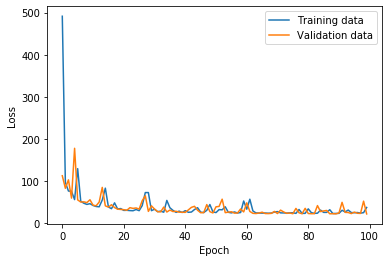

In [3]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')


def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)


def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()

    history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=2)

    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))

    plot_loss(history)
    plt.show()


if __name__ == '__main__':
    main()